<a href="https://colab.research.google.com/github/vipasanasharma/Automated-Prediction-of-Avalanches/blob/main/overfitting_NNM1_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv ('/content/trainingdata.csv')
df = df.fillna(0)
df.head(20)
#Changing pandas dataframe to numpy array
X = df.iloc[:,:30].values
y = df.iloc[:,30:31].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

from sklearn.model_selection import train_test_split
train_x,X_test,train_y,y_test = train_test_split(X,y,test_size = 0.1)
#train_x=X
#train_y=y
print(train_x)
print (train_y)
#df.to_csv('pre.csv')

#creating variables and targets
#train_x = df.drop(columns=['dangerlevel'])
 #print (train_x)

#train_y = df[['dangerlevel']]
#print (train_y)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


#create model
model = Sequential()

#add model layers
model.add(Dense(50, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))


#compile model using mse as a measure of model performance
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.optimizer.learning_rate = 0.001

history = model.fit(train_x,train_y, epochs=100, batch_size=64)

[[ 0.99656624 -0.08706902  1.39769788 ... -0.95112853 -2.14306922
  -0.7939164 ]
 [-0.49843992 -0.08711668 -0.27335354 ...  1.41957261  0.41407334
  -0.33914749]
 [ 0.19534618 -0.01754475 -0.33543727 ... -0.53625583 -0.03948617
  -0.59328306]
 ...
 [-0.34935885 -0.07288245  1.30803954 ... -0.66071764 -0.48378291
  -0.19201638]
 [-1.35252116 -0.03407192 -0.74048683 ... -0.73183867  2.91476275
  -0.59328306]
 [ 1.32817233 -0.02052081 -0.75688162 ... -0.66071764 -0.07231873
  -0.27226971]]
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
Epoch 1/100
411/411 [==============================] - 7s 3ms/step - loss: 0.9958 - accuracy: 0.5888
Epoch 2/100
411/411 [==============================] - 1s 3ms/step - loss: 0.7555 - accuracy: 0.6879
Epoch 3/100
411/411 [==============================] - 1s 3ms/step - loss: 0.7127 - accuracy: 0.7017
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 0.6921 - accurac

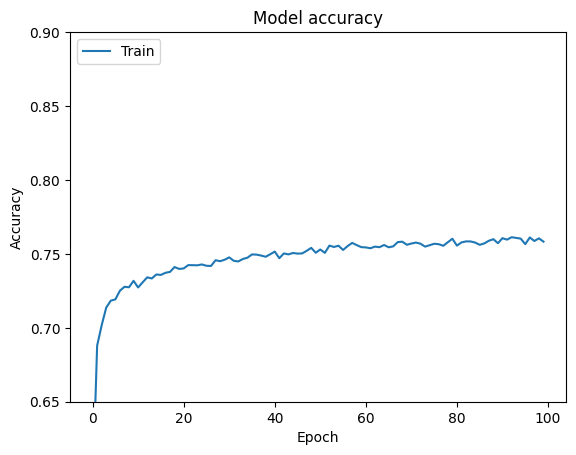

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.ylim(0.65,0.90)


plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [6]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

92/92 [==============================] - 0s 1ms/step
Accuracy is: 74.10958904109589


In [7]:
history = model.fit(train_x, train_y,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
411/411 [==============================] - 2s 5ms/step - loss: 0.5834 - accuracy: 0.7571 - val_loss: 0.5931 - val_accuracy: 0.7449
Epoch 2/100
411/411 [==============================] - 1s 4ms/step - loss: 0.5820 - accuracy: 0.7590 - val_loss: 0.5965 - val_accuracy: 0.7380
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5868 - accuracy: 0.7584 - val_loss: 0.5942 - val_accuracy: 0.7418
Epoch 4/100
411/411 [==============================] - 1s 4ms/step - loss: 0.5843 - accuracy: 0.7580 - val_loss: 0.5897 - val_accuracy: 0.7445
Epoch 5/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5854 - accuracy: 0.7595 - val_loss: 0.5943 - val_accuracy: 0.7459
Epoch 6/100
411/411 [==============================] - 1s 4ms/step - loss: 0.5769 - accuracy: 0.7620 - val_loss: 0.5941 - val_accuracy: 0.7486
Epoch 7/100
411/411 [==============================] - 2s 4ms/step - loss: 0.5809 - accuracy: 0.7590 - val_loss: 0.5928 - val_accuracy: 0.7449

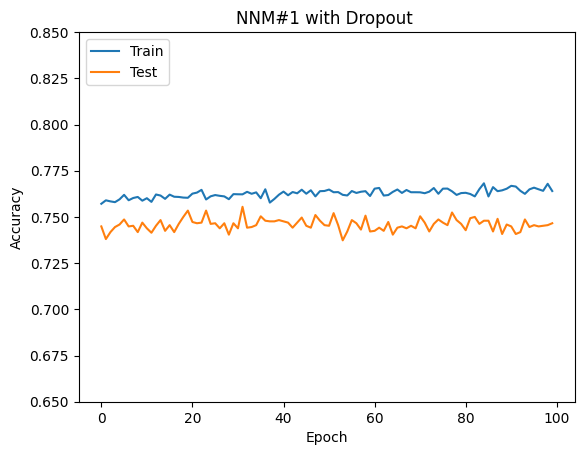

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.65,0.85)
plt.title('NNM#1 with Dropout ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

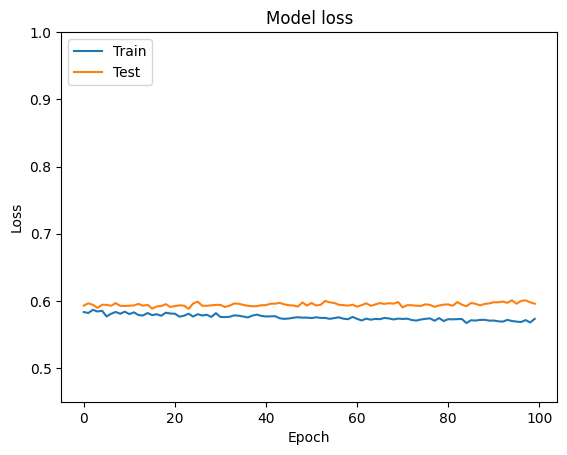

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0.45,1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()